**GROUP ASSIGNMENT (GROUP 7)**  
Group Member:  
1. Foong Kit Wah (TP049786
2. Heng Yi Sheng (TP048930)
3. Kong Xin Ying (TP055102)

# Q1 Unigram

## Loading Text File and Preprocessing

In [2]:
import nltk
nltk.download('punkt')

#Load file
text_file = open("/content/Text_Corpus.txt","r")
corpus = [line.strip() for line in text_file]

##Tokenization & decapitalization
tokenized_corpus = [nltk.tokenize.word_tokenize(corpus[i].lower()) for i in range(len(corpus))]

#remove padding
paddings = ['>', '<', 's', '/s']
filtered_corpus = [[j for j in tokenized_corpus[i] if j not in paddings] for i in range(len(tokenized_corpus))]
            
print(filtered_corpus)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['he', 'read', 'a', 'book'], ['i', 'read', 'a', 'different', 'book'], ['he', 'read', 'a', 'book', 'my', 'mulan']]


### Unsmoothed Unigram Language Model

In [3]:
!pip install -U pip
!pip install -U dill
!pip install -U nltk==3.4

     |████████████████████████████████| 1.7 MB 15.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 1.4 MB 14.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436397 sha256=d61dfe54e71283ac52a66dd61dcdbbd52f254c0c21979cc150ea1cf78bd9f4b3
  Stored in directory: /root/.cache/pip/wheels/13/b8/81/2349be11dd144dc7b68ab983b58cd2fae353cdc50bbdeb09d0
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [4]:
# Libraries import
from nltk.util import everygrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE 


In [5]:
#unigram
n=1;
train_data, padded_sents = padded_everygram_pipeline(n, filtered_corpus)

model = MLE(n) # Train a unigram maximum likelihood estimation model
model.fit(train_data, padded_sents) # Model building

In [6]:
model.score('he') 

0.13333333333333333

In [7]:
model.score('read')

0.2

In [8]:
model.score('a')

0.2

In [9]:
model.score('book')

0.2

In [10]:
model.score('i')

0.06666666666666667

In [11]:
model.score('different')

0.06666666666666667

In [12]:
model.score('mulan')

0.06666666666666667

In [13]:
model.score('my')

0.06666666666666667

### Smoothed Unigram Language Model

In [14]:
from nltk.util import everygrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace

n=1;
train_data, padded_sents = padded_everygram_pipeline(n, filtered_corpus)

model_smooth = Laplace(order = n) # Train a unigram Laplace Smoothed model
model_smooth.fit(train_data, padded_sents) # Model building

In [15]:
model_smooth.score('he')

0.125

In [16]:
model_smooth.score('read')

0.16666666666666666

In [17]:
model_smooth.score('a')

0.16666666666666666

In [18]:
model_smooth.score('book')

0.16666666666666666

In [19]:
model_smooth.score('i')

0.08333333333333333

In [20]:
model_smooth.score('different')

0.08333333333333333

In [21]:
model_smooth.score('mulan')

0.08333333333333333

In [22]:
model_smooth.score('my')

0.08333333333333333

# Q2 Bigram

### Loading Text File and Preprocessing

In [24]:
import nltk
nltk.download('punkt')

# Reading txt file
text = open("/content/Text_Corpus.txt", "r")
corpus = [line.strip() for line in text]

# Perform tokenization and decapitalization
tokenized_corpus = [nltk.tokenize.word_tokenize(corpus[i].lower()) for i in range(len(corpus))]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
paddings = ['>', '<', 's', '/s']

# filter paddings
filtered_corpus = [[j for j in tokenized_corpus[i] if j not in paddings] for i in range(len(tokenized_corpus))]
            
print(filtered_corpus)

[['he', 'read', 'a', 'book'], ['i', 'read', 'a', 'different', 'book'], ['he', 'read', 'a', 'book', 'my', 'mulan']]


In [26]:
!pip install -U pip
!pip install -U dill
!pip install -U nltk==3.4

# Insert paddings at both ends and form bigram
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import bigrams
print(list(pad_both_ends(filtered_corpus[0], n=2)))
print(list(bigrams(pad_both_ends(filtered_corpus[0], n=2))), "\n")

print(list(pad_both_ends(filtered_corpus[1], n=2)))
print(list(bigrams(pad_both_ends(filtered_corpus[0], n=2))), "\n")

print(list(pad_both_ends(filtered_corpus[2], n=2)))
print(list(bigrams(pad_both_ends(filtered_corpus[0], n=2))), "\n")

['<s>', 'he', 'read', 'a', 'book', '</s>']
[('<s>', 'he'), ('he', 'read'), ('read', 'a'), ('a', 'book'), ('book', '</s>')] 

['<s>', 'i', 'read', 'a', 'different', 'book', '</s>']
[('<s>', 'he'), ('he', 'read'), ('read', 'a'), ('a', 'book'), ('book', '</s>')] 

['<s>', 'he', 'read', 'a', 'book', 'my', 'mulan', '</s>']
[('<s>', 'he'), ('he', 'read'), ('read', 'a'), ('a', 'book'), ('book', '</s>')] 



In [27]:
from nltk.lm.preprocessing import flatten

# Perform flattening
print(list(flatten(pad_both_ends(sent, n=2) for sent in filtered_corpus)))

['<s>', 'he', 'read', 'a', 'book', '</s>', '<s>', 'i', 'read', 'a', 'different', 'book', '</s>', '<s>', 'he', 'read', 'a', 'book', 'my', 'mulan', '</s>']


### Unsmoothed Bigram Language Model

In [28]:
# Preprocess the tokenized text for Bi-gram language modelling
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE #Maximum likelihood estimation 

#Bi-gram
train_data, padded_sents = padded_everygram_pipeline(2, filtered_corpus)

model = MLE(2) # Train a Bi-gram maximum likelihood estimation model.
model.fit(train_data, padded_sents) # Model building

In [29]:
model.score('he', '<s>'.split()) # P('he'|'<s>')

0.6666666666666666

In [30]:
model.score('read', 'he'.split()) # P('read'|'he')

1.0

In [31]:
model.score('a', 'read'.split()) # P('a'|'read')

1.0

In [32]:
model.score('book', 'a'.split()) # P('book'|'a')

0.6666666666666666

In [33]:
model.score('</s>', 'book'.split()) # P('</s>'|'book')

0.6666666666666666

In [34]:
model.score('i', '<s>'.split()) # P('i'|'<s>')

0.3333333333333333

In [35]:
model.score('read', 'i'.split()) # P('read'|'i')

1.0

In [36]:
model.score('different', 'a'.split()) # P('different'|'a')

0.3333333333333333

In [37]:
model.score('book', 'different'.split()) # P('book'|'different')

1.0

In [38]:
model.score('my', 'book'.split()) # P('my'|'book')

0.3333333333333333

In [39]:
model.score('mulan', 'my'.split()) # P('mulan'|'my')

1.0

In [40]:
model.score('</s>', 'mulan'.split()) # P('</s>'|'mulan')

1.0

### Smoothed Bigram Language Model - Laplace

In [41]:
# Preprocess the tokenized text for Bi-gram language modelling
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace # Laplace Smoothed
from nltk.lm import Vocabulary

# Create lookup vocabulary as <s> and </s> should not be considered as the vocabulary
vocab = Vocabulary(["he", "read", "a", "book", "i", "different", "my", "mulan"])

# Bi-gram
train_data, padded_sents = padded_everygram_pipeline(2, filtered_corpus)

model_smoothed = Laplace(vocabulary = vocab, order = 2) # Train a Bi-gram Laplace Smoothed model.
model_smoothed.fit(train_data, padded_sents) # Model building

In [42]:
print(model_smoothed.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 9 items>


In [43]:
model_smoothed.score('he', '<s>'.split()) # P('he'|'<s>')

0.25

In [44]:
model_smoothed.score('read', 'he'.split()) # P('read'|'he')

0.2727272727272727

In [45]:
model_smoothed.score('a', 'read'.split()) # P('a'|'read')

0.3333333333333333

In [46]:
model_smoothed.score('book', 'a'.split()) # P('book'|'a')

0.25

In [47]:
model_smoothed.score('</s>', 'book'.split()) # P('</s>'|'book')

0.25

In [48]:
model_smoothed.score('i', '<s>'.split()) # P('i'|'<s>')

0.16666666666666666

In [49]:
model_smoothed.score('read', 'i'.split()) # P('read'|'i')

0.2

In [50]:
model_smoothed.score('different', 'a'.split()) # P('different'|'a') 

0.16666666666666666

In [51]:
model_smoothed.score('book', 'different'.split()) # P('book'|'different')

0.2

In [52]:
model_smoothed.score('my', 'book'.split()) # P('my'|'book')

0.16666666666666666

In [53]:
model_smoothed.score('mulan', 'my'.split()) # P('mulan'|'my')

0.2

In [54]:
model_smoothed.score('</s>', 'mulan'.split()) # P('</s>'|'mulan')

0.2

# Q3 Sentence Probabilities

## Unigram

In [55]:
# P(He read a book)
# = P (He) x P (read) x P (a) x P (book) 
model_smooth.score('he') * model_smooth.score('read') * model_smooth.score('a') * model_smooth.score('book')

0.0005787037037037037

In [56]:
# P(I read a different book)
# = P (I) x P (read) x P (a) x P (different) x P (book)
model_smooth.score('i') * model_smooth.score('read') * model_smooth.score('a') * model_smooth.score('different') * model_smooth.score('book')

3.215020576131687e-05

In [57]:
# P(He read a book my Mulan)
# = P (He) x P (read) x P (a) x P (book) x P (my) x P (Mulan)
model_smooth.score('he') * model_smooth.score('read') * model_smooth.score('a') * model_smooth.score('book') * model_smooth.score('my') * model_smooth.score('mulan')

4.0187757201646085e-06

## Bigram

In [58]:
# P(<s> He read a book </s>)
# = P (He | <s>) x P (read | He) x P (a | read) x P (book | a) x P (</s> | book)
model_smoothed.score('he', '<s>'.split()) * model_smoothed.score('read', 'he'.split()) * model_smoothed.score('a', 'read'.split()) * model_smoothed.score('book', 'a'.split()) * model_smoothed.score('</s>', 'book'.split())

0.0014204545454545453

In [59]:
# P(<s> I read a different book </s>)
# = P (I | <s>) x P (read | I) x P (a | read) x P (different | a) x P (book | different) x P (</s> | book)
model_smoothed.score('i', '<s>'.split()) * model_smoothed.score('read', 'i'.split()) * model_smoothed.score('a', 'read'.split()) * model_smoothed.score('different', 'a'.split()) * model_smoothed.score('book', 'different'.split()) * model_smoothed.score('</s>', 'book'.split()) 

9.259259259259257e-05

In [60]:
# P(<s> He read a book my Mulan </s>)
# = P (He | <s>) x P (read | He) x P (a | read) x P (book | a) x P (my | book) x P (Mulan | my) x P (</s> | Mulan)
model_smoothed.score('he', '<s>'.split()) * model_smoothed.score('read', 'he'.split()) * model_smoothed.score('a', 'read'.split()) * model_smoothed.score('book', 'a'.split()) * model_smoothed.score('my', 'book'.split()) * model_smoothed.score('mulan', 'my'.split()) * model_smoothed.score('</s>', 'mulan'.split())

3.787878787878788e-05

# Q4 Sentiment Analysis

### Load Dataset

In [61]:
import pandas as pd
data = pd.read_csv("/content/Musical_Instruments_Reviews.csv")

In [62]:
data.head()

,Reviews
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...


### Predict the sentiments using unsupervised technique - NLTK VADER

In [63]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer() #Create SentimentIntensityAnalyzer object

def get_sentiments(sentence):    
    outcome = sentiment.polarity_scores(sentence)
    
    if outcome['compound'] == 0:
        return 'Neutral'
    elif outcome['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'

In [65]:
data['Sentiments'] = data.apply(lambda x: get_sentiments(x['Reviews']), axis = 1)

In [66]:
data['Sentiments'].value_counts()

Positive    9059
Negative    1007
Neutral      188
Name: Sentiments, dtype: int64

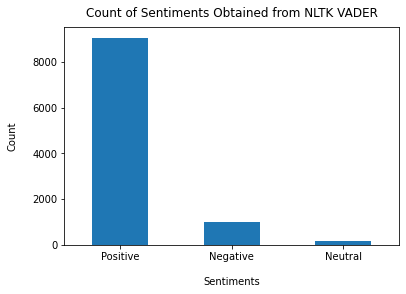

In [67]:
import matplotlib.pyplot as plt
data['Sentiments'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Sentiments", labelpad = 15)
plt.ylabel("Count", labelpad = 15)
plt.title("Count of Sentiments Obtained from NLTK VADER", y = 1.02);

### Export DataFrame to CSV file

In [68]:
output_loc = r'/content/Musical_Instruments_Reviews_Updated.csv'
data.to_csv(output_loc, index = False)

### Text Classification - Naive Bayes

In [69]:
new_data = pd.read_csv("/content/Musical_Instruments_Reviews_Updated.csv")
new_data.head()

,Reviews,Sentiments
0,"Not much to write about here, but it does exac...",Positive
1,The product does exactly as it should and is q...,Positive
2,The primary job of this device is to block the...,Negative
3,Nice windscreen protects my MXL mic and preven...,Positive
4,This pop filter is great. It looks and perform...,Positive


In [70]:
print("Number of Records: " , len(new_data))

Number of Records:  10254


In [71]:
# Text-preprocessing
import nltk, string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Decapitalize the words
new_data['Reviews'] = new_data['Reviews'].apply(lambda x: x.lower())

# Punctuation removal
def remove_punctuation(text):
    text_clean = "".join(([i for i in text if i not in string.punctuation]))
    return text_clean

# Create new column for cleaned reviews
new_data['cleaned_Reviews']= new_data['Reviews'].apply(lambda x:remove_punctuation(x))

# Tokenization
def tokenization(text):
  wordtokens = nltk.tokenize.word_tokenize(text)
  return wordtokens

# Overwrite cleaned reviews after tokenization
new_data['cleaned_Reviews'] = new_data['cleaned_Reviews'].apply(lambda x: tokenization(x))

# Stopwords removal
stopTokens = nltk.corpus.stopwords.words("english")
stopTokens.remove('not') #'not' is important for sentiment analysis. Thus it will be removed from stopwords list

def remove_stopwords(text):
    output= [i for i in text if i not in stopTokens]
    return output

# Overwrite cleaned reviews after stopwords removal
new_data['cleaned_Reviews']= new_data['cleaned_Reviews'].apply(lambda x:remove_stopwords(x))


# Lemmatization
def lemmatization(text):
  wn = WordNetLemmatizer()
  output = " ".join([wn.lemmatize(t) for t in text])
  return output

# Overwrite cleaned reviews after lemmatization
new_data['cleaned_Reviews'] = new_data['cleaned_Reviews'].apply(lambda x: lemmatization(x))
new_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Reviews,Sentiments,cleaned_Reviews
0,"not much to write about here, but it does exac...",Positive,not much write exactly supposed filter pop sou...
1,the product does exactly as it should and is q...,Positive,product exactly quite affordablei not realized...
2,the primary job of this device is to block the...,Negative,primary job device block breath would otherwis...
3,nice windscreen protects my mxl mic and preven...,Positive,nice windscreen protects mxl mic prevents pop ...
4,this pop filter is great. it looks and perform...,Positive,pop filter great look performs like studio fil...


In [72]:
# Convert DataFrame to List
feature_set = [(data_iter['cleaned_Reviews'], data_iter['Sentiments']) for index, data_iter in new_data.iterrows()]

In [73]:
feature_set[:5]

[('not much write exactly supposed filter pop sound recording much crisp one lowest price pop filter amazon might well buy honestly work despite pricing',
  'Positive'),
 ('product exactly quite affordablei not realized double screened arrived even better expectedas added bonus one screen carry small hint smell old grape candy used buy reminiscents sake not stop putting pop filter next nose smelling recording dif needed pop filter work well expensive one may even come pleasing aroma like mine didbuy product',
  'Positive'),
 ('primary job device block breath would otherwise produce popping sound allowing voice pas noticeable reduction volume high frequency double cloth filter block pop let voice coloration metal clamp mount attache mike stand secure enough keep attached goose neck need little coaxing stay put',
  'Negative'),
 ('nice windscreen protects mxl mic prevents pop thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging',
  'Positi

In [74]:
from nltk.tokenize import word_tokenize

# Perform tokenization
all_words = [word_tokenize(feature_set[sentence][0]) for sentence in range(len(feature_set))]
# Merge all lists together into 1 list
all_words = sum(all_words, [])

In [75]:
# Count of all words in the text corpus
print('total words in the text corpus: ', len(all_words))

total words in the text corpus:  479819


In [76]:
all_words = nltk.FreqDist(all_words)
print('Total vocabularies: ', len(all_words))

Total vocabularies:  29650


In [77]:
# Top 15 most commmon words exist in the text corpus
all_words.most_common(15)

[('guitar', 6651),
 ('not', 5888),
 ('one', 4749),
 ('sound', 4560),
 ('string', 4500),
 ('great', 3979),
 ('like', 3929),
 ('use', 3708),
 ('good', 3683),
 ('pedal', 3585),
 ('work', 3060),
 ('well', 3016),
 ('get', 2927),
 ('would', 2360),
 ('amp', 2352)]

In [78]:
# Get 3000 words
word_features = list(all_words)[:3000]
print(word_features)

['not', 'much', 'write', 'exactly', 'supposed', 'filter', 'pop', 'sound', 'recording', 'crisp', 'one', 'lowest', 'price', 'amazon', 'might', 'well', 'buy', 'honestly', 'work', 'despite', 'pricing', 'product', 'quite', 'affordablei', 'realized', 'double', 'screened', 'arrived', 'even', 'better', 'expectedas', 'added', 'bonus', 'screen', 'carry', 'small', 'hint', 'smell', 'old', 'grape', 'candy', 'used', 'reminiscents', 'sake', 'stop', 'putting', 'next', 'nose', 'smelling', 'dif', 'needed', 'expensive', 'may', 'come', 'pleasing', 'aroma', 'like', 'mine', 'didbuy', 'primary', 'job', 'device', 'block', 'breath', 'would', 'otherwise', 'produce', 'popping', 'allowing', 'voice', 'pas', 'noticeable', 'reduction', 'volume', 'high', 'frequency', 'cloth', 'let', 'coloration', 'metal', 'clamp', 'mount', 'attache', 'mike', 'stand', 'secure', 'enough', 'keep', 'attached', 'goose', 'neck', 'need', 'little', 'coaxing', 'stay', 'put', 'nice', 'windscreen', 'protects', 'mxl', 'mic', 'prevents', 'thing',

In [79]:
def find_features(doc):
  words = set(doc)
  features = {}
  for w in word_features:
    features[w] = (w in words)
  return features 

print((find_features(word_tokenize(feature_set[0][0]))))

{'not': True, 'much': True, 'write': True, 'exactly': True, 'supposed': True, 'filter': True, 'pop': True, 'sound': True, 'recording': True, 'crisp': True, 'one': True, 'lowest': True, 'price': True, 'amazon': True, 'might': True, 'well': True, 'buy': True, 'honestly': True, 'work': True, 'despite': True, 'pricing': True, 'product': False, 'quite': False, 'affordablei': False, 'realized': False, 'double': False, 'screened': False, 'arrived': False, 'even': False, 'better': False, 'expectedas': False, 'added': False, 'bonus': False, 'screen': False, 'carry': False, 'small': False, 'hint': False, 'smell': False, 'old': False, 'grape': False, 'candy': False, 'used': False, 'reminiscents': False, 'sake': False, 'stop': False, 'putting': False, 'next': False, 'nose': False, 'smelling': False, 'dif': False, 'needed': False, 'expensive': False, 'may': False, 'come': False, 'pleasing': False, 'aroma': False, 'like': False, 'mine': False, 'didbuy': False, 'primary': False, 'job': False, 'device

In [80]:
# Data Preparation
feature_set_new = [(find_features(word_tokenize(text)), sentiment) for (text, sentiment) in feature_set]

# Set random state
import random
random.shuffle(feature_set_new)

# Split into training set and testing set
train_set, test_set = feature_set_new[3000:], feature_set_new[:3000]

In [81]:
# Fit the training set into Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [82]:
nltk.classify.accuracy(classifier, test_set)

0.83

In [83]:
classifier.show_most_informative_features(20)

Most Informative Features
                soundman = True           Neutra : Positi =     49.1 : 1.0
                 fearful = True           Neutra : Positi =     49.1 : 1.0
              florescent = True           Neutra : Positi =     49.1 : 1.0
             keyboardist = True           Neutra : Positi =     49.1 : 1.0
             notoriously = True           Neutra : Positi =     49.1 : 1.0
                   great = True           Positi : Neutra =     27.7 : 1.0
                    like = True           Positi : Neutra =     24.5 : 1.0
                     834 = True           Neutra : Positi =     21.1 : 1.0
                  leader = True           Neutra : Positi =     16.4 : 1.0
                     800 = True           Neutra : Positi =     16.4 : 1.0
                 listing = True           Negati : Positi =     15.5 : 1.0
                   hated = True           Negati : Positi =     15.5 : 1.0
                 broader = True           Negati : Positi =     15.5 : 1.0

### Model performance metrics

In [84]:
!pip install NLTK
from nltk import NaiveBayesClassifier
import collections
from nltk import precision
from nltk import recall
from nltk import f_measure
from nltk import ConfusionMatrix

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
labels = []
tests = []
 
for i, (text, sentiment) in enumerate(test_set):
    refsets[sentiment].add(i)
    observed = classifier.classify(text)
    testsets[observed].add(i)
    labels.append(sentiment)
    tests.append(observed)

#Confusion matrix
print('CONFUSION MATRIX\n')
print(nltk.ConfusionMatrix(labels, tests))

# Model Evaluation Metrics
accuracy = nltk.classify.accuracy(classifier, test_set)

#Positive class
pos_precision = precision(refsets['Positive'], testsets['Positive'])
pos_recall = recall(refsets['Positive'], testsets['Positive'])
pos_fmeasure = f_measure(refsets['Positive'], testsets['Positive'])
#Neutral class
neu_precision = precision(refsets['Neutral'], testsets['Neutral'])
neu_recall = recall(refsets['Neutral'], testsets['Neutral'])
neu_fmeasure = f_measure(refsets['Neutral'], testsets['Neutral'])
#Negative class
neg_precision = precision(refsets['Negative'], testsets['Negative'])
neg_recall = recall(refsets['Negative'], testsets['Negative'])
neg_fmeasure = f_measure(refsets['Negative'], testsets['Negative'])

print('')
print('---------------------------------------')
print('        NAIVE BAYES CLASSIFIER         ')
print('---------------------------------------')
print('Accuracy:', accuracy)
print('\n')

#Positive sentiment
print('Positive sentiment')
print('---------------------------------------')
print('Pos_Precision', (pos_precision))
print('Pos_Recall', (pos_recall))
print('Pos_F1-Score', (pos_fmeasure))
print('\n')

#Neutral sentiment
print('Neutral sentiment')
print('---------------------------------------')
print('Neu_Precision', (neu_precision))
print('Neu_Recall', (neu_recall))
print('Neu_F1-Score', (neu_fmeasure))
print('\n')

#Negative sentiment
print('Negative sentiment')
print('---------------------------------------')
print('Neg_Precision', (neg_precision))
print('Neg_Recall', (neg_recall))
print('Neg_F1-Score', (neg_fmeasure))
print('\n')



CONFUSION MATRIX

         |    N         P |
         |    e    N    o |
         |    g    e    s |
         |    a    u    i |
         |    t    t    t |
         |    i    r    i |
         |    v    a    v |
         |    e    l    e |
---------+----------------+
Negative | <114>  21  182 |
 Neutral |   15  <23>  20 |
Positive |  196   76<2353>|
---------+----------------+
(row = reference; col = test)


---------------------------------------
        NAIVE BAYES CLASSIFIER         
---------------------------------------
Accuracy: 0.83


Positive sentiment
---------------------------------------
Pos_Precision 0.9209393346379647
Pos_Recall 0.8963809523809524
Pos_F1-Score 0.9084942084942085


Neutral sentiment
---------------------------------------
Neu_Precision 0.19166666666666668
Neu_Recall 0.39655172413793105
Neu_F1-Score 0.2584269662921348


Negative sentiment
---------------------------------------
Neg_Precision 0.3507692307692308
Neg_Recall 0.35962145110410093
Neg_F1-Score 